In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/aishwaryamate/Datasets/main/Cars.csv")

In [3]:
df.describe()

,HP,MPG,VOL,SP,WT
count,81.000000,81.000000,81.000000,81.000000,81.000000
mean,117.469136,34.422076,98.765432,121.540272,32.412577
std,57.113502,9.131445,22.301497,14.181432,7.492813
min,49.000000,12.101263,50.000000,99.564907,15.712859
25%,84.000000,27.856252,89.000000,113.829145,29.591768
50%,100.000000,35.152727,101.000000,118.208698,32.734518
75%,140.000000,39.531633,113.000000,126.404312,37.392524
max,322.000000,53.700681,160.000000,169.598513,52.997752


In [4]:
df.isna().sum()

HP     0
MPG    0
VOL    0
SP     0
WT     0
dtype: int64

In [5]:
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 300

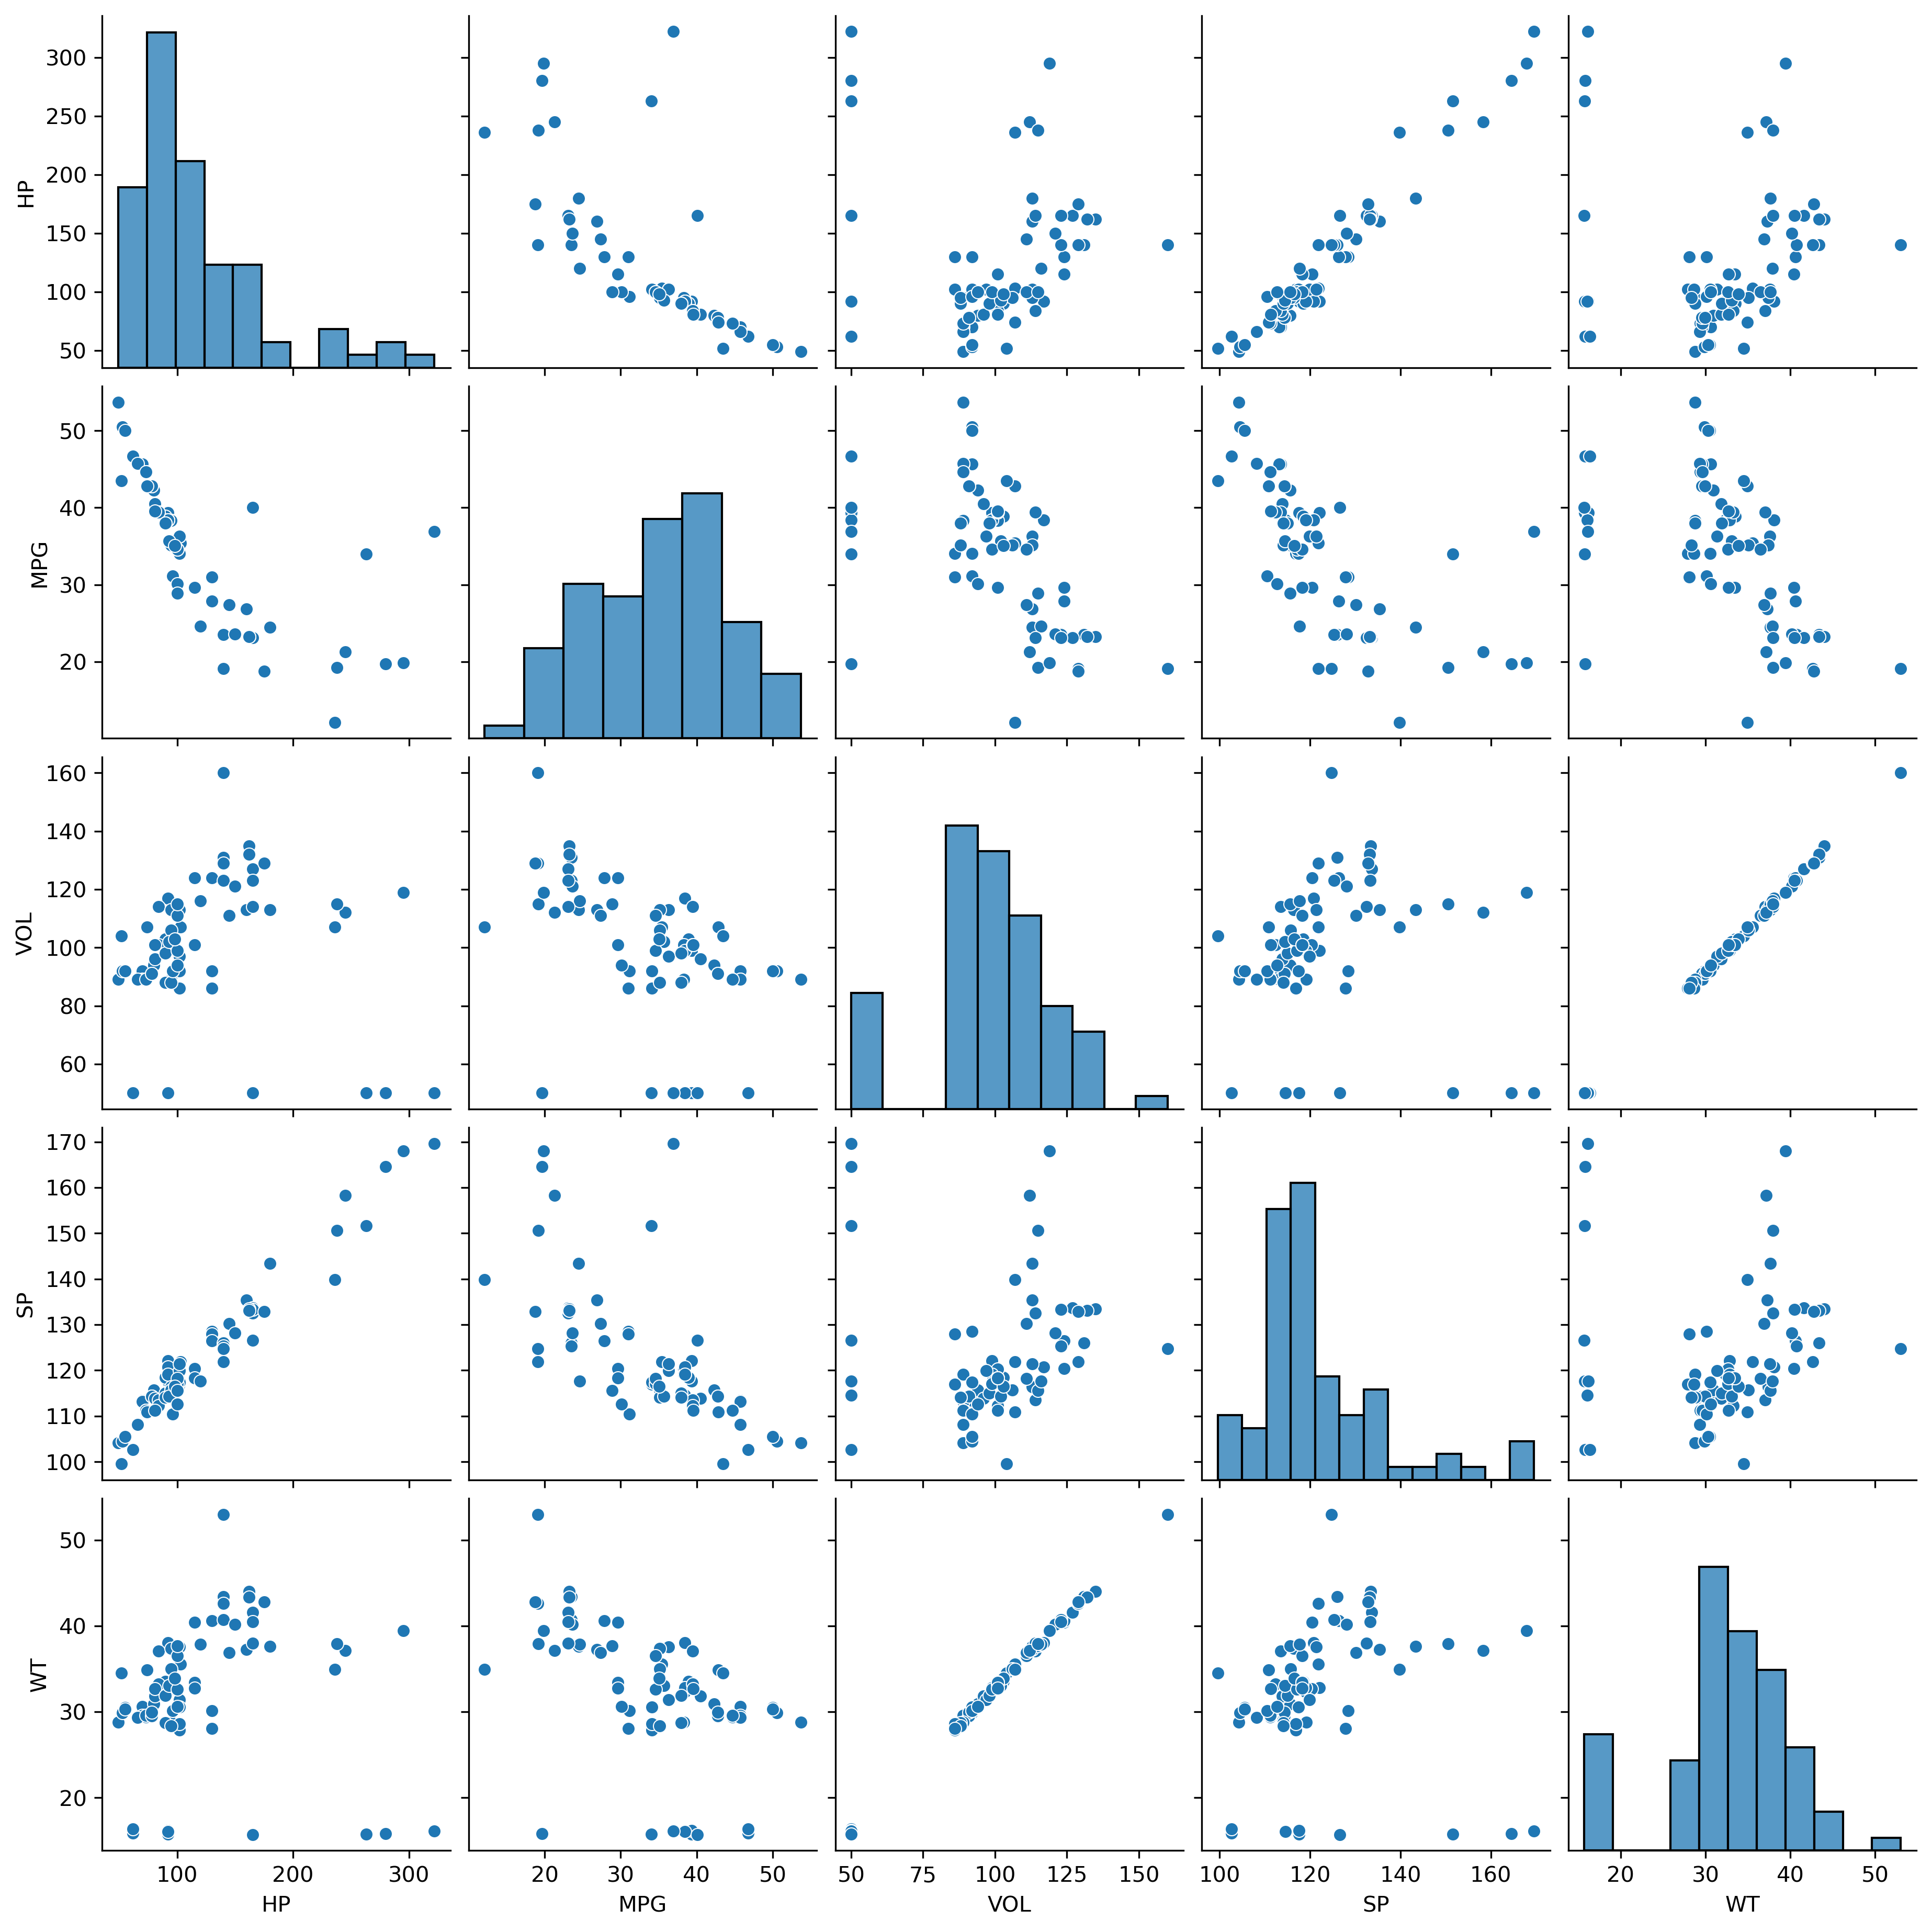

In [6]:
sns.pairplot(df)

array([[<AxesSubplot:xlabel='HP', ylabel='HP'>,
        <AxesSubplot:xlabel='MPG', ylabel='HP'>,
        <AxesSubplot:xlabel='VOL', ylabel='HP'>,
        <AxesSubplot:xlabel='SP', ylabel='HP'>,
        <AxesSubplot:xlabel='WT', ylabel='HP'>],
       [<AxesSubplot:xlabel='HP', ylabel='MPG'>,
        <AxesSubplot:xlabel='MPG', ylabel='MPG'>,
        <AxesSubplot:xlabel='VOL', ylabel='MPG'>,
        <AxesSubplot:xlabel='SP', ylabel='MPG'>,
        <AxesSubplot:xlabel='WT', ylabel='MPG'>],
       [<AxesSubplot:xlabel='HP', ylabel='VOL'>,
        <AxesSubplot:xlabel='MPG', ylabel='VOL'>,
        <AxesSubplot:xlabel='VOL', ylabel='VOL'>,
        <AxesSubplot:xlabel='SP', ylabel='VOL'>,
        <AxesSubplot:xlabel='WT', ylabel='VOL'>],
       [<AxesSubplot:xlabel='HP', ylabel='SP'>,
        <AxesSubplot:xlabel='MPG', ylabel='SP'>,
        <AxesSubplot:xlabel='VOL', ylabel='SP'>,
        <AxesSubplot:xlabel='SP', ylabel='SP'>,
        <AxesSubplot:xlabel='WT', ylabel='SP'>],
       [<AxesSubpl

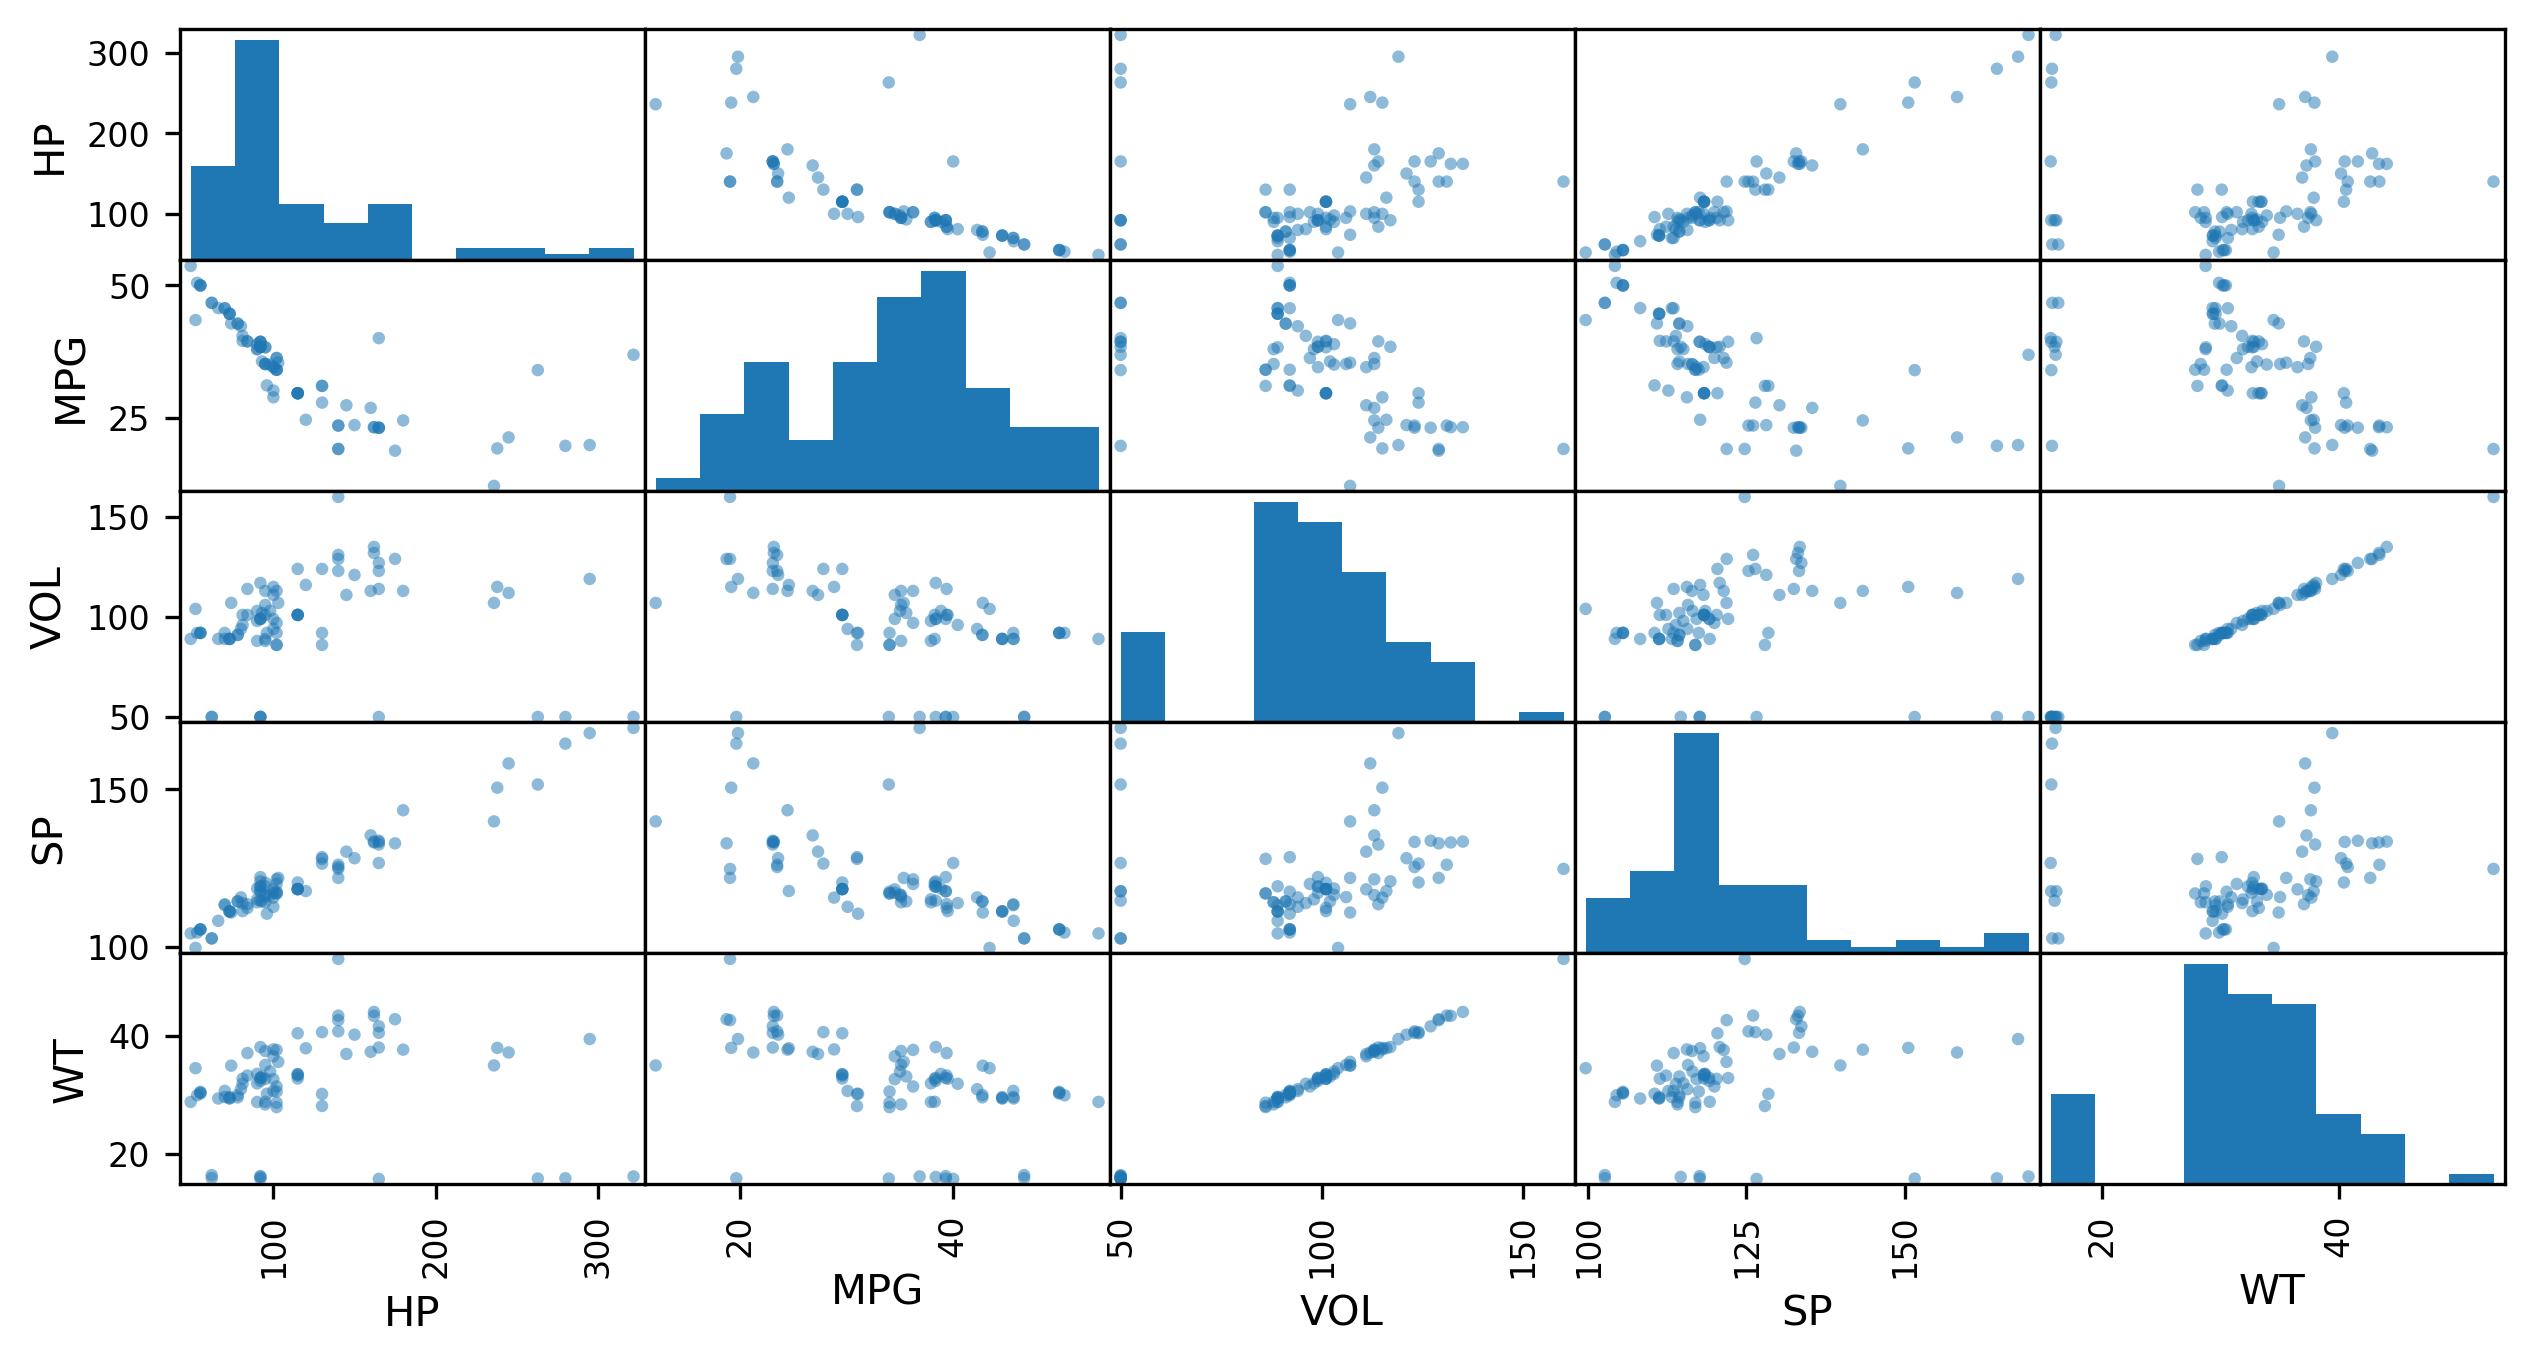

In [7]:
pd.plotting.scatter_matrix(df)
#same as above with pd library

In [8]:
df.corr()

,HP,MPG,VOL,SP,WT
HP,1.000000,-0.725038,0.077459,0.973848,0.076513
MPG,-0.725038,1.000000,-0.529057,-0.687125,-0.526759
VOL,0.077459,-0.529057,1.000000,0.102170,0.999203
SP,0.973848,-0.687125,0.102170,1.000000,0.102439
WT,0.076513,-0.526759,0.999203,0.102439,1.000000


<AxesSubplot:>

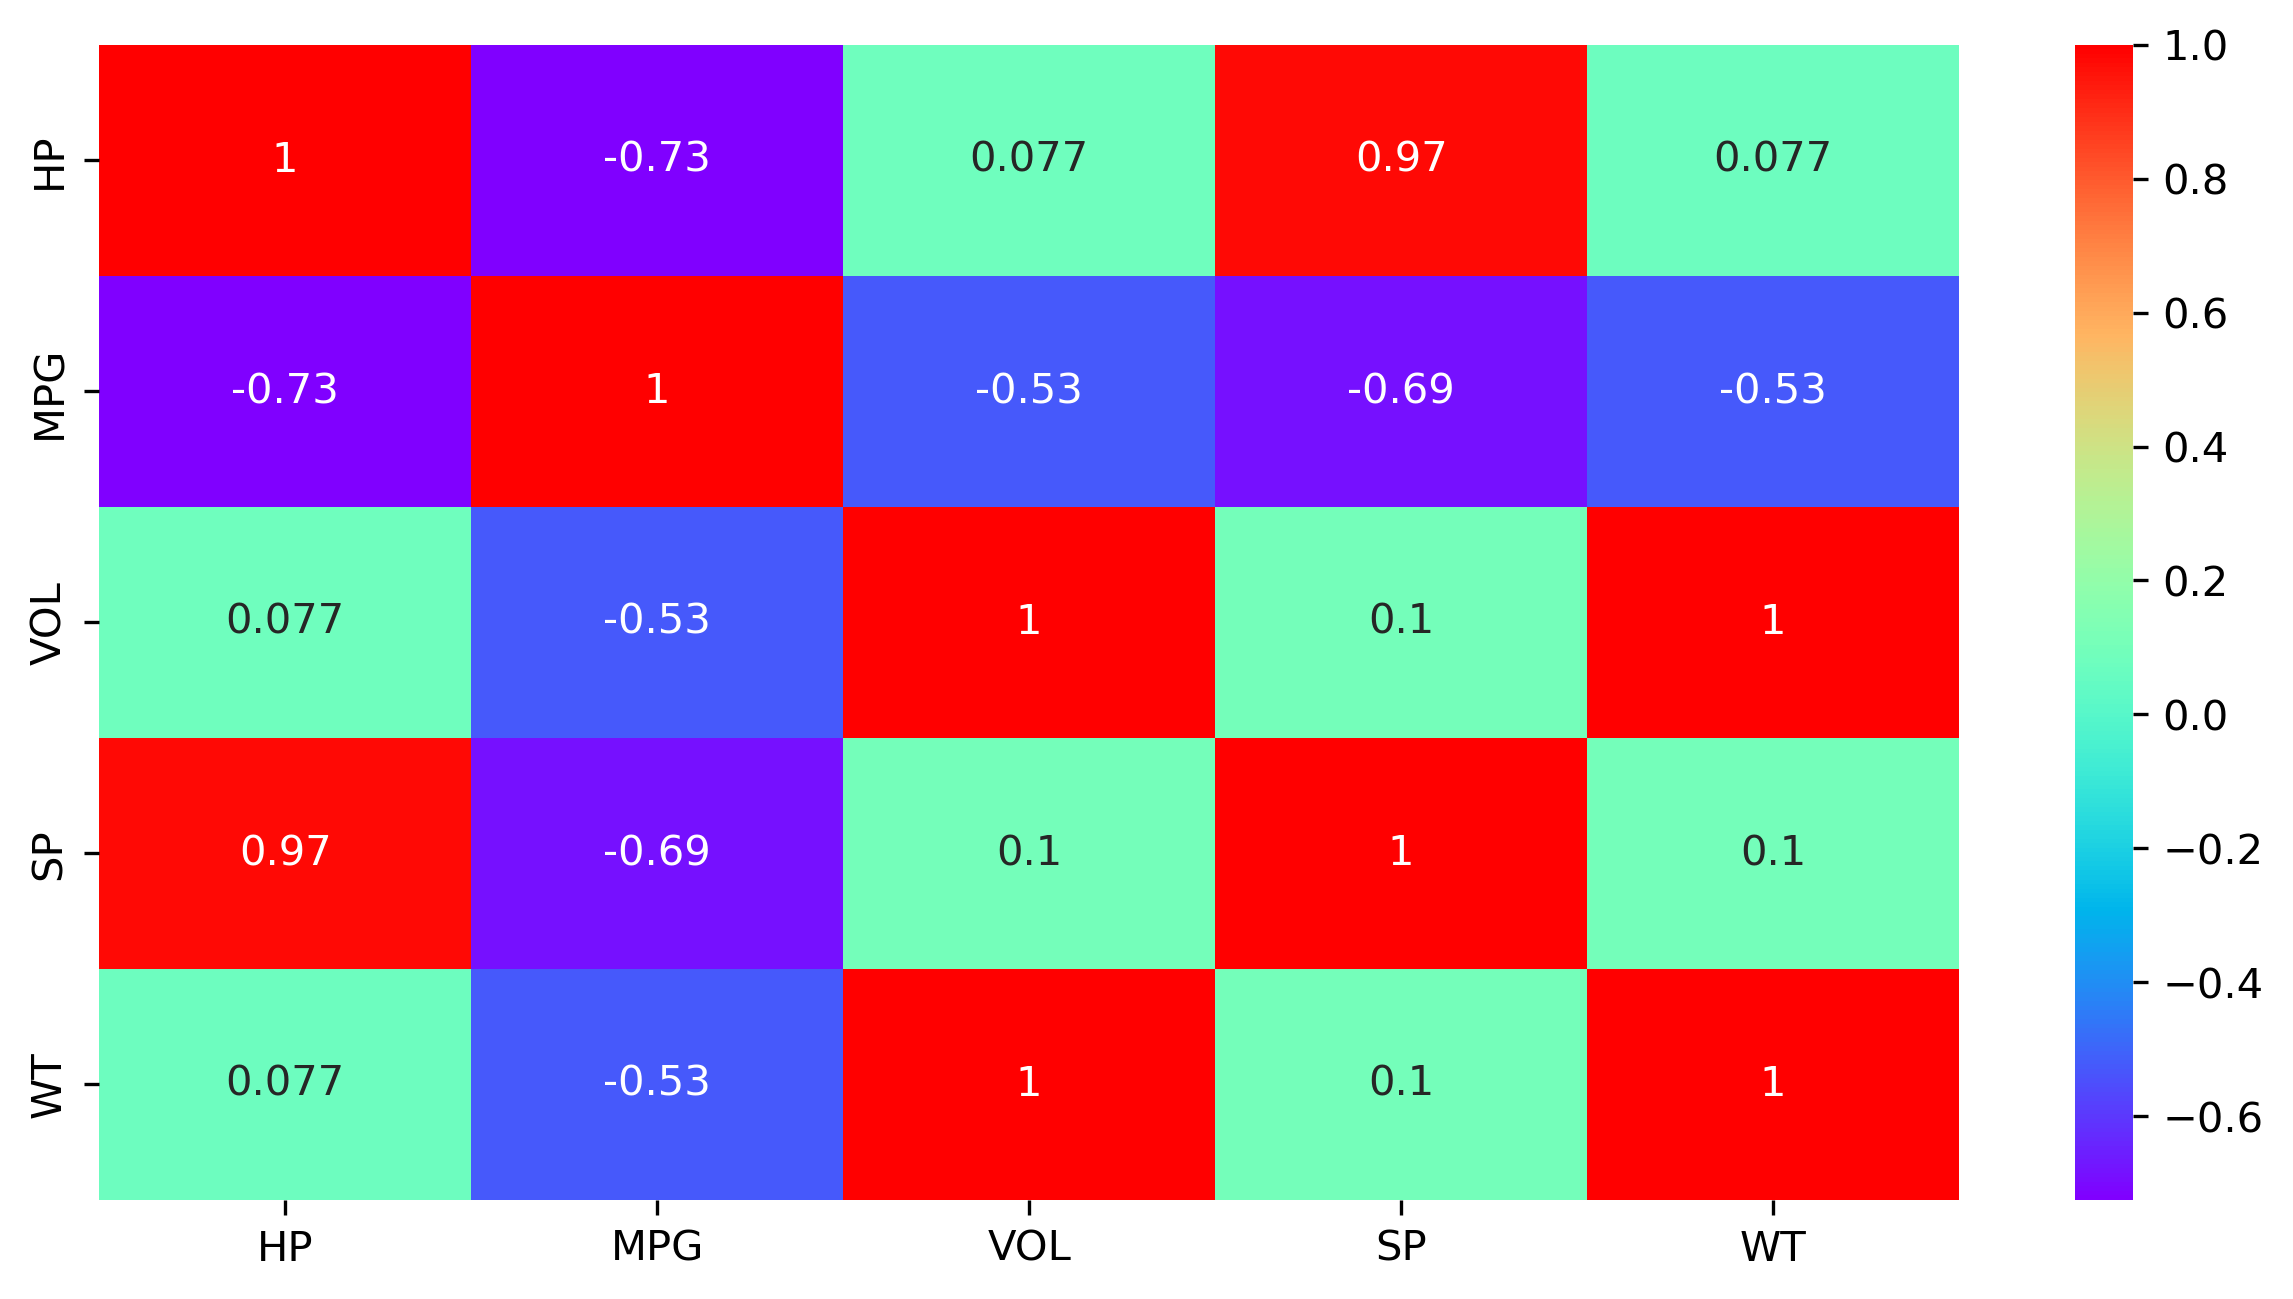

In [9]:
sns.heatmap(df.corr(), annot=True, cmap='rainbow')

In [10]:
import statsmodels.formula.api as smf

In [11]:
model = smf.ols('MPG~HP+VOL+SP+WT', data=df).fit()

In [12]:
model.params

Intercept    30.677336
HP           -0.205444
VOL          -0.336051
SP            0.395627
WT            0.400574
dtype: float64

In [13]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     63.80
Date:                Wed, 04 Jan 2023   Prob (F-statistic):           1.54e-23
Time:                        22:50:26   Log-Likelihood:                -233.96
No. Observations:                  81   AIC:                             477.9
Df Residuals:                      76   BIC:                             489.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.6773     14.900      2.059      0.043       1.001      60.354
HP            -0.2054      0.039     -5.239      0.000      -0.284      -0.127
VOL           -0.3361      0.569     -0.591      0.556      -1.469       0.796
SP             0.3956      0.158      2.500      0.015       0.080       0.711
WT             0.4006      1.693      0.237      0.814      -2.972       3.773
==============================================================================
Omnibus:                       10.780   Durbin-Watson:                   1.403
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               11.722
Skew:                           0.707   Prob(JB):                      0.00285
Kurtosis:                       4.215   Cond. No.                     6.09e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [14]:
#Simple linear regression model
#MPG and VOL model
vol_model = smf.ols('MPG~VOL', data=df).fit()

In [15]:
vol_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.280
Model:                            OLS   Adj. R-squared:                  0.271
Method:                 Least Squares   F-statistic:                     30.71
Date:                Wed, 04 Jan 2023   Prob (F-statistic):           3.82e-07
Time:                        22:50:27   Log-Likelihood:                -280.28
No. Observations:                  81   AIC:                             564.6
Df Residuals:                      79   BIC:                             569.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     55.8171      3.957     14.106      0.000      47.941      63.693
VOL           -0.2166      0.039     -5.541      0.000      -0.294      -0.139
==============================================================================
Omnibus:                        2.691   Durbin-Watson:                   0.566
Prob(Omnibus):                  0.260   Jarque-Bera (JB):                1.997
Skew:                          -0.263   Prob(JB):                        0.368
Kurtosis:                       3.562   Cond. No.                         462.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
wt_model = smf.ols('MPG~WT', data=df).fit()

In [17]:
wt_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.277
Model:                            OLS   Adj. R-squared:                  0.268
Method:                 Least Squares   F-statistic:                     30.34
Date:                Wed, 04 Jan 2023   Prob (F-statistic):           4.38e-07
Time:                        22:50:27   Log-Likelihood:                -280.42
No. Observations:                  81   AIC:                             564.8
Df Residuals:                      79   BIC:                             569.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     55.2296      3.876     14.249      0.000      47.514      62.945
WT            -0.6420      0.117     -5.508      0.000      -0.874      -0.410
==============================================================================
Omnibus:                        2.735   Durbin-Watson:                   0.555
Prob(Omnibus):                  0.255   Jarque-Bera (JB):                2.045
Skew:                          -0.263   Prob(JB):                        0.360
Kurtosis:                       3.573   Cond. No.                         149.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
model2 = smf.ols('MPG~WT+VOL', data=df).fit()

In [19]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.264
Method:                 Least Squares   F-statistic:                     15.33
Date:                Wed, 04 Jan 2023   Prob (F-statistic):           2.43e-06
Time:                        22:50:27   Log-Likelihood:                -280.16
No. Observations:                  81   AIC:                             566.3
Df Residuals:                      78   BIC:                             573.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     56.8847      4.534     12.546      0.000      47.858      65.912
WT             1.4349      2.929      0.490      0.626      -4.397       7.266
VOL           -0.6983      0.984     -0.710      0.480      -2.658       1.261
==============================================================================
Omnibus:                        2.405   Durbin-Watson:                   0.591
Prob(Omnibus):                  0.300   Jarque-Bera (JB):                1.712
Skew:                          -0.251   Prob(JB):                        0.425
Kurtosis:                       3.506   Cond. No.                         597.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
#Calculating VIF
df.columns

Index(['HP', 'MPG', 'VOL', 'SP'], dtype='object')

In [21]:
r_hp = smf.ols('HP~VOL+SP+WT',data=df).fit().rsquared
v_hp = 1/(1-r_hp)

r_vol = smf.ols('VOL~HP+SP+WT',data=df).fit().rsquared
v_vol = 1/(1-r_vol)

r_sp = smf.ols('SP~VOL+HP+WT',data=df).fit().rsquared
v_sp = 1/(1-r_sp)

r_wt = smf.ols('WT~HP+VOL+SP',data=df).fit().rsquared
v_wt = 1/(1-r_wt)

In [22]:
vif = pd.DataFrame({
    'Features' : ['HP','VOL','SP','WT'],
    'VIF' : [v_hp,v_vol,v_sp,v_wt]
 })

vif

,Features,VIF
0,HP,19.926589
1,VOL,638.806084
2,SP,20.007639
3,WT,639.533818


In [23]:
df.drop(columns=['WT'],inplace=True)

In [24]:
df

,HP,MPG,VOL,SP
0,49,53.700681,89,104.185353
1,55,50.013401,92,105.461264
2,55,50.013401,92,105.461264
3,70,45.696322,92,113.461264
4,53,50.504232,92,104.461264
...,...,...,...,...
76,322,36.900000,50,169.598513
77,238,19.197888,115,150.576579
78,263,34.000000,50,151.598513
79,295,19.833733,119,167.944460


In [25]:
final_model = smf.ols('MPG~HP+VOL+SP', data=df).fit()

In [26]:
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     86.11
Date:                Wed, 04 Jan 2023   Prob (F-statistic):           1.56e-24
Time:                        22:50:27   Log-Likelihood:                -233.99
No. Observations:                  81   AIC:                             476.0
Df Residuals:                      77   BIC:                             485.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     29.9234     14.466      2.069      0.042       1.118      58.729
HP            -0.2067      0.039     -5.353      0.000      -0.284      -0.130
VOL           -0.2017      0.023     -8.928      0.000      -0.247      -0.157
SP             0.4007      0.156      2.571      0.012       0.090       0.711
==============================================================================
Omnibus:                       10.810   Durbin-Watson:                   1.389
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               11.822
Skew:                           0.704   Prob(JB):                      0.00271
Kurtosis:                       4.233   Cond. No.                     5.87e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.87e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [35]:
#Prediction for newdataw data
newdata = pd.DataFrame({
    'HP' : [52],
    'VOL' : [65],
    'SP' : [200]
})

In [33]:
newdata

,HP,VOL,SP
0,52,65,200


In [34]:
final_model.predict(newdata)

0    86.199308
dtype: float64